# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.056871e+01     7.768429e+00
 * time: 0.0023407936096191406
     1     2.922818e+01     4.689437e+00
 * time: 0.009413003921508789
     2     2.072501e+01     5.890681e+00
 * time: 0.018481969833374023
     3     1.523543e+01     5.049344e+00
 * time: 0.026799917221069336
     4     1.184920e+01     1.888436e+00
 * time: 0.03446793556213379
     5     1.128689e+01     3.562650e+00
 * time: 0.040838003158569336
     6     1.041665e+01     1.859041e+00
 * time: 0.046852827072143555
     7     9.371007e+00     1.448098e+00
 * time: 0.053018808364868164
     8     8.780518e+00     1.504837e+00
 * time: 0.05919694900512695
     9     8.526571e+00     1.104102e+00
 * time: 0.06595683097839355
    10     8.365621e+00     8.485706e-01
 * time: 0.07262897491455078
    11     8.164654e+00     9.229791e-01
 * time: 0.07939696311950684
    12     8.142854e+00     1.277225e+00
 * time: 0.08467388153076172
    13     8.070957e+00     6.267503e-01


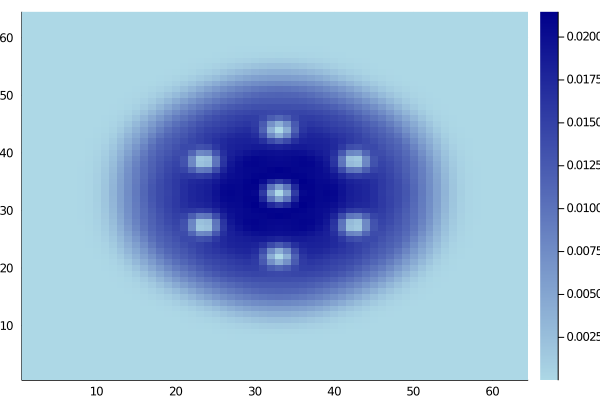

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)